In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('report2and3.csv').groupby(['threadsCount', 'nodeId'])['duration'].mean()

In [3]:
results = {}
for (thread_count, node_id), duration in df.items():

    if thread_count not in results:
        results[thread_count] = []

    results[thread_count].append(duration)


Text(0.5, 0.98, 'Mean Duration over 100 Simulations')

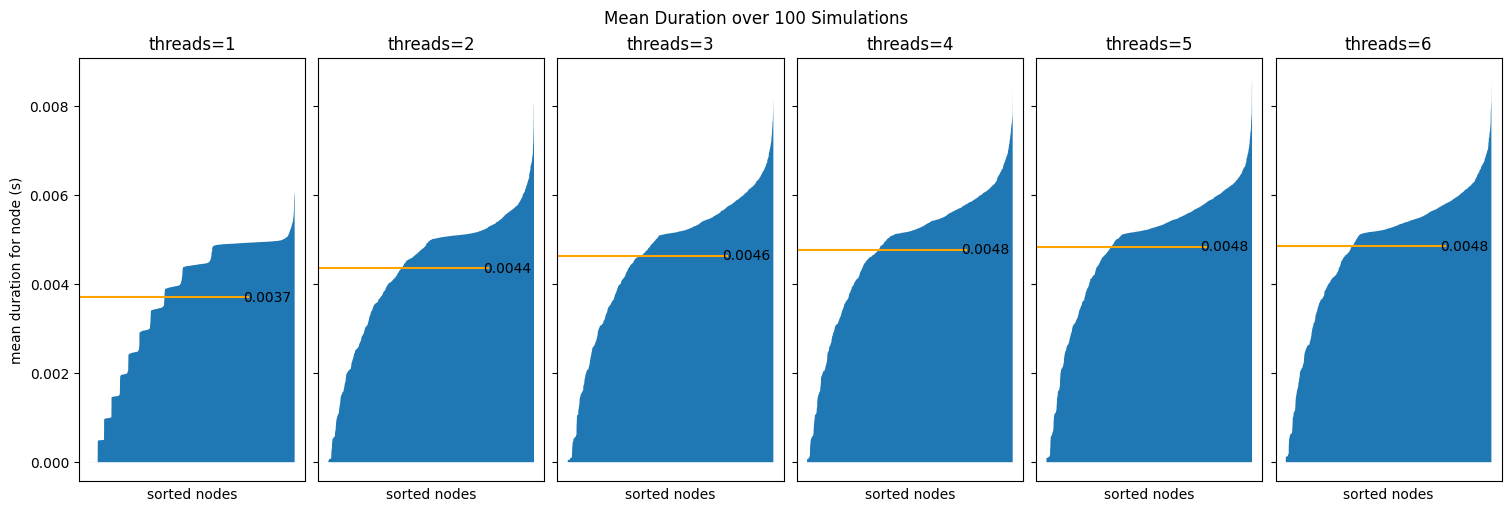

In [5]:
fig, axs = plt.subplots(1, len(results), figsize=(15,5), sharey=True, layout='constrained')

for i, (thread_count, mean_node_durations) in enumerate(results.items()):

    axs[i].fill_between(np.arange(len(mean_node_durations)), np.sort(mean_node_durations))
    axs[i].set_xticks([])
    axs[i].set_xlabel('sorted nodes')
    thread_mean = np.mean(mean_node_durations)
    hline = axs[i].axhline(
        y=thread_mean,
        xmax=.75,
        color='orange',
        linestyle='-'
    )
    axs[i].text(1690, thread_mean, round(thread_mean, 4), ha='right', va='center')
    axs[i].set_title(f'threads={thread_count}')

axs[0].set_ylabel('mean duration for node (s)')
fig.suptitle('Mean Duration over 100 Simulations')


